xmin = [1. 1.]
fmin = 0.0
number of iterations = 242


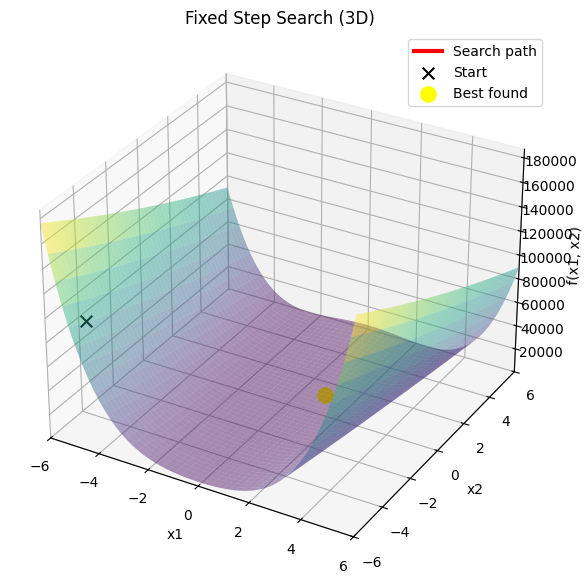

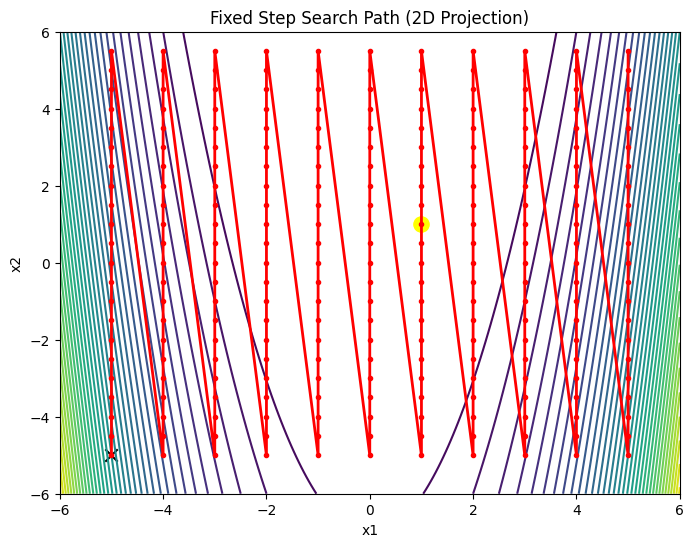

In [1]:
from test_functions import f_himmelblau, f_booth, f_rosenbrock
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


def fixed_step_search(f, a, b, Delta):
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)
    n = len(a)

    x = a.copy()
    xmin = a.copy()
    fmin = f(a)
    trace = [x.copy()]

    condition = True

    while condition:
        i = n - 1
        while x[i] > b[i]:
            x[i] = a[i]
            i -= 1
            if i < 0:
                condition = False
                break
            x[i] += Delta

        if not condition:
            break

        fx = f(x)
        if fx < fmin:
            fmin = fx
            xmin = x.copy()

        x[i] += Delta
        trace.append(x.copy())

    return xmin, fmin, np.array(trace)


f_test = f_rosenbrock

a = [-5, -5]
b = [5, 5]
Delta = 0.5

xmin, fmin, history = fixed_step_search(f_test, a, b, Delta)

print("xmin =", xmin)
print("fmin =", fmin)
print("number of iterations =", len(history))


xg = np.linspace(a[0] - 1, b[0] + 1, 250)
yg = np.linspace(a[1] - 1, b[1] + 1, 250)
X, Y = np.meshgrid(xg, yg)

f_vec = np.vectorize(lambda xx, yy: f_test(np.array([xx, yy], dtype=float)))
Z = f_vec(X, Y)

xs = history[:, 0]
ys = history[:, 1]
zs = np.array([f_test(np.array([x, y], dtype=float)) for x, y in zip(xs, ys)])

z_offset = 0.02 * (Z.max() - Z.min())
zs_plot = zs + z_offset


fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(
    X, Y, Z,
    cmap="viridis",
    alpha=0.45,
    linewidth=0
)

line, = ax.plot([], [], [], "r-", lw=3, label="Search path")
point, = ax.plot([], [], [], "ro", markersize=6)

ax.scatter(xs[0], ys[0], zs_plot[0], color="black", s=70, marker="x", label="Start")
ax.scatter(xmin[0], xmin[1], fmin + z_offset, color="yellow", s=120, label="Best found")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.set_title("Fixed Step Search (3D)")
ax.legend()

ax.set_xlim(xg.min(), xg.max())
ax.set_ylim(yg.min(), yg.max())
ax.set_zlim(Z.min(), Z.max() + 3 * z_offset)


def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point


def update(frame):
    line.set_data(xs[:frame + 1], ys[:frame + 1])
    line.set_3d_properties(zs_plot[:frame + 1])
    point.set_data([xs[frame]], [ys[frame]])
    point.set_3d_properties([zs_plot[frame]])
    return line, point


anim = FuncAnimation(
    fig,
    update,
    frames=len(xs),
    init_func=init,
    interval=200,
    blit=False,
    repeat=False
)

plt.show()


plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=35)
plt.plot(xs, ys, "r-o", markersize=3, linewidth=2)
plt.scatter(xs[0], ys[0], color="black", marker="x", s=80)
plt.scatter(xmin[0], xmin[1], color="yellow", s=120)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Fixed Step Search Path (2D Projection)")
plt.show()
